# Bike trips activity on the Ford GoBike sharing system in San Francisco Bay area.

## Investigation Overview
In this investigation, I wanted to look at features in the bike sharing system, and how the bike trips distribution can be affected by these features. the focus was on the bike trips durations and the day of week activity features.

## Dataset Overview

The dataset includes information about 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The attributes include the trips durations, station information, bike ids, and weather the customer is a subscriber or casual, as well as additional measurements such as gender and birth year of the customers. 197 data point were removed from the analysis due to missing information.

In [65]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

default_color = sb.color_palette()[2]

In [3]:
# load in the dataset into a pandas dataframe, print statistics
bike_trips = pd.read_csv('tripdata.csv')

In [7]:
# data wrangling, removing trips with inconsistent or missing data.

# dropping the null station names
bike_trips = bike_trips[bike_trips['start_station_name'].notna()]

# changing types
bike_trips['start_station_id'] = bike_trips['start_station_id'].astype(np.int64)
bike_trips['end_station_id'] = bike_trips['end_station_id'].astype(np.int64)
bike_trips['start_time'] = pd.to_datetime(bike_trips['start_time']) 
bike_trips['end_time'] = pd.to_datetime(bike_trips['end_time']) 

# creating day_of_week column
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
              categories = ['Sunday',  'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# adding day_of_week column                                     
bike_trips['day_of_week'] = bike_trips['start_time'].dt.day_name().astype(ordered_var)

# adding duration in minutes column
bike_trips['duration_min'] = bike_trips['duration_sec'].apply(lambda x : x / 60)

## Distribution of Days Activity:
Day of Week activity in the data set is showing high activity distributions during the workdays, while the activity decreases during the weekends.

In [121]:

def bar_with_percentage(bike_data, variable, title, xlabel):
  fig, ax = plt.subplots(figsize=[8, 5])
  
  sb.countplot(data = bike_data, x = variable, color = default_color)

  # Recalculating the type_counts just to have clarity.
  type_counts = bike_data[variable].value_counts()

  # get the current tick locations and labels
  locs, labels = plt.xticks() 

  # loop through each pair of locations and labels
  for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/bike_data.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+4, pct_string, ha = 'center', color = 'black', fontdict={'fontsize': 12})

  plt.ylabel('Count', fontsize=13)
  plt.xlabel(xlabel)
  plt.title(title, fontdict={'fontsize': 15},pad=20)
  plt.gca().spines["top"].set_visible(False)  
  plt.gca().spines["right"].set_visible(False)
  plt.show()

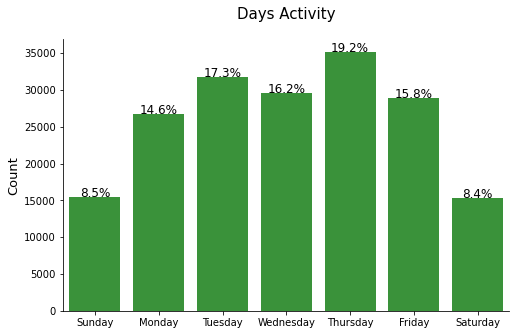

In [122]:
# plot the day_of_week variable
bar_with_percentage(bike_trips, 'day_of_week', 'Days Activity', '')

## Distribution of Trips Durations:
Trips durations in the data set take a very large range of values, from about 5 minutes at the lowest, to about 1400 minutes at the highest, the distribution of durations takes a unimodal shape that is skewed to the right.

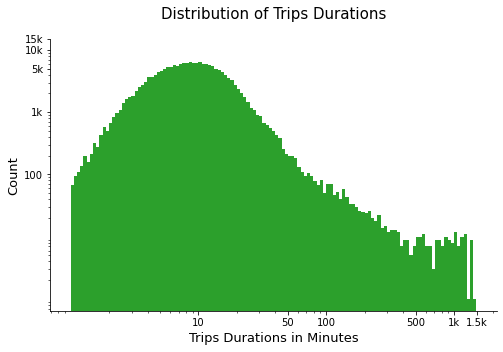

In [120]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(bike_trips['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_min', bins = bins, color = default_color)
plt.xscale('log')
plt.yscale('log')
plt.xticks([10, 50, 100, 500, 1000, 1500], [10, 50, 100, 500, '1k', '1.5k'])
plt.yticks([100, 1e3, 5e3, 1e4, 15e3 ], [ 100, '1k', '5k', '10k', '15k'])
plt.xlabel('Trips Durations in Minutes', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Distribution of Trips Durations', fontdict={'fontsize': 15}, pad=20)
plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

plt.show()


## Distribution of Customer Types:
The data is showing that the subscriber customers are making most of the trips activity with more than 89%.

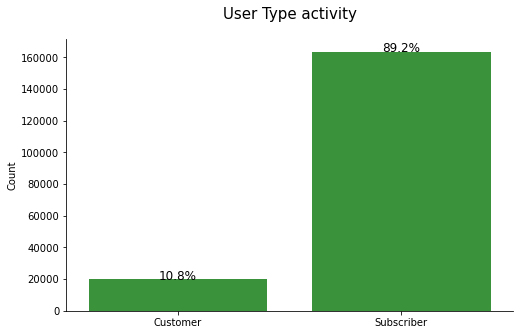

In [82]:
# plot the user_type variable
bar_with_percentage(bike_trips, 'user_type', 'User Type activity', '')

## Days Activity vs Average Trips Durations
Plotting the average durations against the days activity showing that the high duration strips were happening during the weekends. while most of 12 minutes average trips were made during the workdays.

In [116]:
def bar_plot_avg_durations(x, title):
  fig, ax = plt.subplots(figsize=[8, 5])
  sb.barplot(data=bike_trips, x=x, y='duration_min', color=default_color, errwidth=0)
  # plt.xticks(rotation=15)
  plt.ylabel('Avg. Durations (min)', fontsize=13)
  plt.xlabel('')
  plt.title(title, fontdict={'fontsize': 15}, pad=20)
  plt.gca().spines["top"].set_visible(False)  
  plt.gca().spines["right"].set_visible(False)
  plt.show()

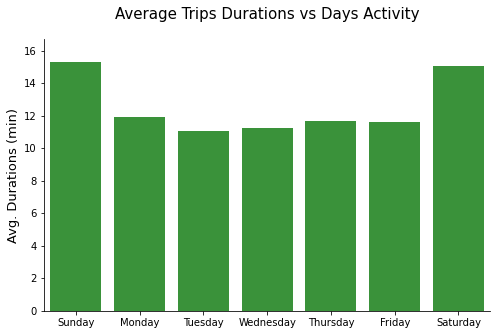

In [117]:
bar_plot_avg_durations('day_of_week', 'Average Trips Durations vs Days Activity')

## Durations vs Customer type
Data is also showing most of the high duration trips were made by the casual costomers.


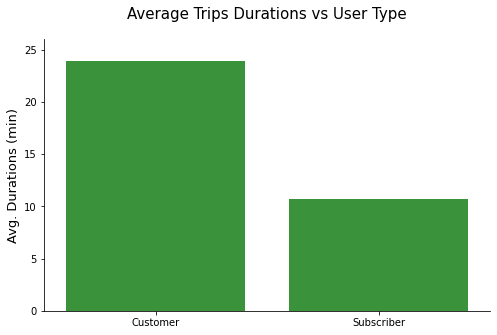

In [118]:
bar_plot_avg_durations('user_type', 'Average Trips Durations vs User Type')

## Days Activity vs Customer type
Plotting the Days activity against the customer types to see that our subscribers were making the highest bike rents, and most of these rents were made during the workdays.

In [133]:
def bar_weekday_usertype(bike_data, variable, hue, title):
  fig, ax = plt.subplots(figsize=[8, 5])

  heu_color = sb.color_palette()[1]
  sb.countplot(data = bike_data, x = variable, hue=hue, palette=[default_color,heu_color])

  # Recalculating the type_counts just to have clarity.
  type_counts = bike_data[[variable,hue]].value_counts()

  # get the current tick locations and labels
  locs, labels = plt.xticks() 

  # loop through each pair of locations and labels
  for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count_sub = type_counts[label.get_text()]['Subscriber']
    count_cus = type_counts[label.get_text()]['Customer']
    # print(count)
    pct_string1 = '{:0.1f}%'.format(100*count_sub/(bike_data.shape[0]))
    pct_string2 = '{:0.1f}%'.format(100*count_cus/(bike_data.shape[0]))

    # print the annotation just below the top of the bar
    plt.text(loc, count_sub-2, pct_string1, color = 'black')
    plt.text(loc, count_cus, pct_string2, ha = 'right', color = 'black')

  plt.ylabel('Avg. Durations (min)', fontsize=13)
  plt.xlabel('')
  plt.title(title, fontdict={'fontsize': 15}, pad=20)
  plt.gca().spines["top"].set_visible(False)  
  plt.gca().spines["right"].set_visible(False)

  plt.legend(bbox_to_anchor=(1.05, 1),
            loc='upper left', borderaxespad=0.)

  plt.show()

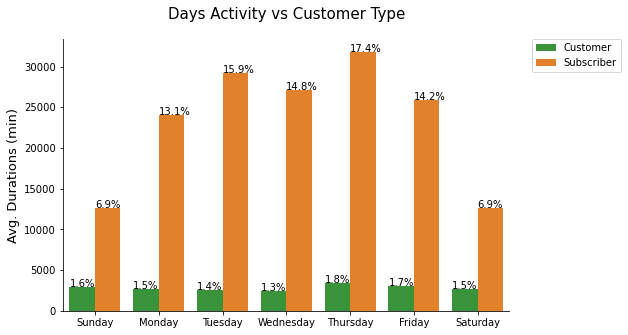

In [134]:
bar_weekday_usertype(bike_trips, 'day_of_week', 'user_type', 'Days Activity vs Customer Type' )

## Average Trips Durations by Days Activity and User Types
We can see from the below plot how are the casual customers are making the higher trips durations during the weekends, while the subscribers are dominating the lower duration rates.

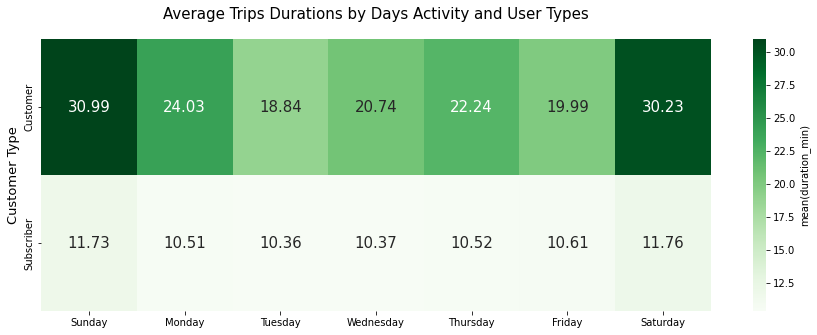

In [135]:
cat_means = bike_trips.groupby(['day_of_week', 'user_type']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'day_of_week',
                            values = 'duration_min_avg')

fig, ax = plt.subplots(figsize = [15,5])

sb.heatmap(cat_means, annot = True, fmt = '.2f', annot_kws={'fontsize':15}, cmap="Greens",
           cbar_kws = {'label' : 'mean(duration_min)'})

plt.ylabel('Customer Type', fontsize=13)
plt.xlabel('')
plt.title('Average Trips Durations by Days Activity and User Types', fontdict={'fontsize': 15}, pad=20);